In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
%matplotlib inline 

In [2]:
house=fetch_california_housing()

In [3]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
X,Y=house.data,house.target

In [5]:
Y.shape

(20640,)

In [6]:
# 训练集，测试机，验证集的划分
from sklearn.model_selection import train_test_split
X_train_all, X_test, y_train_all, y_test=train_test_split(X,Y,random_state=666)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_all,y_train_all,random_state=888)

In [7]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(11610, 8)
(3870, 8)
(5160, 8)


In [8]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(11610,)
(3870,)
(5160,)


In [9]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)

In [10]:
X_test_scaled=scale.transform(X_test)
X_valid_scaled=scale.transform(X_valid)

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,activation="relu",input_shape=X_valid_scaled.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
callbacks=[tf.keras.callbacks.EarlyStopping(patience=10,min_delta=1e-4)]

In [17]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_valid_scaled,y_valid),epochs=200,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3550 - val_loss: 0.3556
Epoch 2/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3546 - val_loss: 0.3560
Epoch 3/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3543 - val_loss: 0.3547
Epoch 4/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3534 - val_loss: 0.3556
Epoch 5/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3531 - val_loss: 0.3545
Epoch 6/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3527 - val_loss: 0.3543
Epoch 7/200
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3521 - val_loss: 0.3542
Epoch 8/200
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3520 - val_loss: 0.3522
Epoch 9/200
11610/11610 [==============================] - 0s 35us/sample - loss: 0.351

Epoch 76/200
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3303 - val_loss: 0.3312
Epoch 77/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3299 - val_loss: 0.3319
Epoch 78/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3300 - val_loss: 0.3304
Epoch 79/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3294 - val_loss: 0.3305
Epoch 80/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3293 - val_loss: 0.3306
Epoch 81/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3290 - val_loss: 0.3309
Epoch 82/200
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3288 - val_loss: 0.3299
Epoch 83/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3286 - val_loss: 0.3289
Epoch 84/200
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3284 - val_loss: 0.3292
Epoch 85/200
11610/

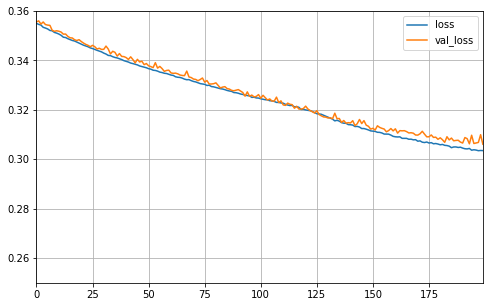

In [21]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0.25,0.36)
    plt.show()

plot_learning_curve(history)

In [22]:
model.evaluate(X_test_scaled,y_test,verbose=0)

0.327445673665335

In [24]:
X_test.dtype

dtype('float64')

In [25]:
y_valid.dtype

dtype('float64')